# Important Links

GAN for Face Generator: https://github.com/AshishJangra27/Face-Generator-with-GAN

Gender Style Transfer: https://github.com/AshishJangra27/Gender-Style-Transfer

Gender Classifier: https://github.com/AshishJangra27/Gender-Classifier

LinkedIn: https://www.linkedin.com/in/ashish-jangra/

Assignment:

- Load the pretrainde Generator
- Load Gender Vector
- Generate 10 variations of the image from male to female as per gender vector

# **Data Loading**
- GAN Face Generator
- Gender Style Transfer
- Gender Classifier

In [2]:
# Download the pre-trained generator model
!wget https://raw.githubusercontent.com/AshishJangra27/Face-Generator-with-GAN/main/generator_700.h5 -O generator_700.h5

--2025-09-19 08:22:50--  https://raw.githubusercontent.com/AshishJangra27/Face-Generator-with-GAN/main/generator_700.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24338984 (23M) [application/octet-stream]
Saving to: ‘generator_700.h5’

generator_700.h5    100%[===================>]  23.21M  --.-KB/s    in 0.1s    

2025-09-19 08:22:50 (158 MB/s) - ‘generator_700.h5’ saved [24338984/24338984]



In [3]:
# Load the pre-trained generator model
from tensorflow.keras.models import load_model

try:
    generator = load_model('generator_700.h5')
    print("✅ Generator model loaded successfully!")
except Exception as e:
    print(f"⚠️ Error loading the generator model: {e}")

✅ Generator model loaded successfully!


## Load gender vector

### Subtask:
Load the pre-calculated gender vector from the `Gender-Style-Transfer` repository.


**Reasoning**:
Download the `gender_vec.npy` file from the GitHub repository.



In [4]:
!wget https://github.com/AshishJangra27/Gender-Style-Transfer/blob/main/gender_vec.npy?raw=true -O gender_vec.npy

--2025-09-19 08:23:01--  https://github.com/AshishJangra27/Gender-Style-Transfer/blob/main/gender_vec.npy?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/AshishJangra27/Gender-Style-Transfer/raw/refs/heads/main/gender_vec.npy [following]
--2025-09-19 08:23:01--  https://github.com/AshishJangra27/Gender-Style-Transfer/raw/refs/heads/main/gender_vec.npy
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AshishJangra27/Gender-Style-Transfer/refs/heads/main/gender_vec.npy [following]
--2025-09-19 08:23:01--  https://raw.githubusercontent.com/AshishJangra27/Gender-Style-Transfer/refs/heads/main/gender_vec.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to ra

**Reasoning**:
Load the downloaded `.npy` file into a NumPy array and store it in the `gender_vector` variable.



In [ ]:
import numpy as np

gender_vector = np.load('gender_vec.npy')
print(gender_vector)

[[-0.05478645 -0.114842   -0.01518576 -0.05204009 -0.33291319 -0.14301158
  -0.06315659  0.15530318  0.35226835 -0.2233536   0.37908     0.18801062
  -0.08730981 -0.46865175 -0.36178236  0.05096163 -0.37590794  0.05809658
   0.01184345 -0.11792198 -0.17184215 -0.29254956  0.1816972   0.10340008
   0.29698148  0.13738097 -0.06392506  0.34061705  0.21613098 -0.17029291
  -0.01247712  0.14354251 -0.18945978 -0.32408784  0.24134309 -0.41079436
   0.53260371  0.05901311  0.20361925  0.39806108 -0.17610286 -0.20452294
  -0.22543444 -0.07153255 -0.26445809  0.22763855 -0.04348516  0.12997434
  -0.03830962  0.07540316 -0.16736046  0.33230106  0.00621929  0.17168332
  -0.20180173  0.13465692 -0.0845578   0.18435748 -0.31218845 -0.14609092
  -0.04791086 -0.19169929  0.16902465 -0.15818881  0.09132981  0.50687629
  -0.12879393 -0.07016915  0.17227242 -0.02986186 -0.20334112  0.28256702
   0.22044075 -0.05638778 -0.13397296  0.02699272 -0.20402719 -0.12281531
   0.05754045  0.147102    0.13566271 

Variations of the image from male to female as per **gender vector**

✅ Generator loaded!


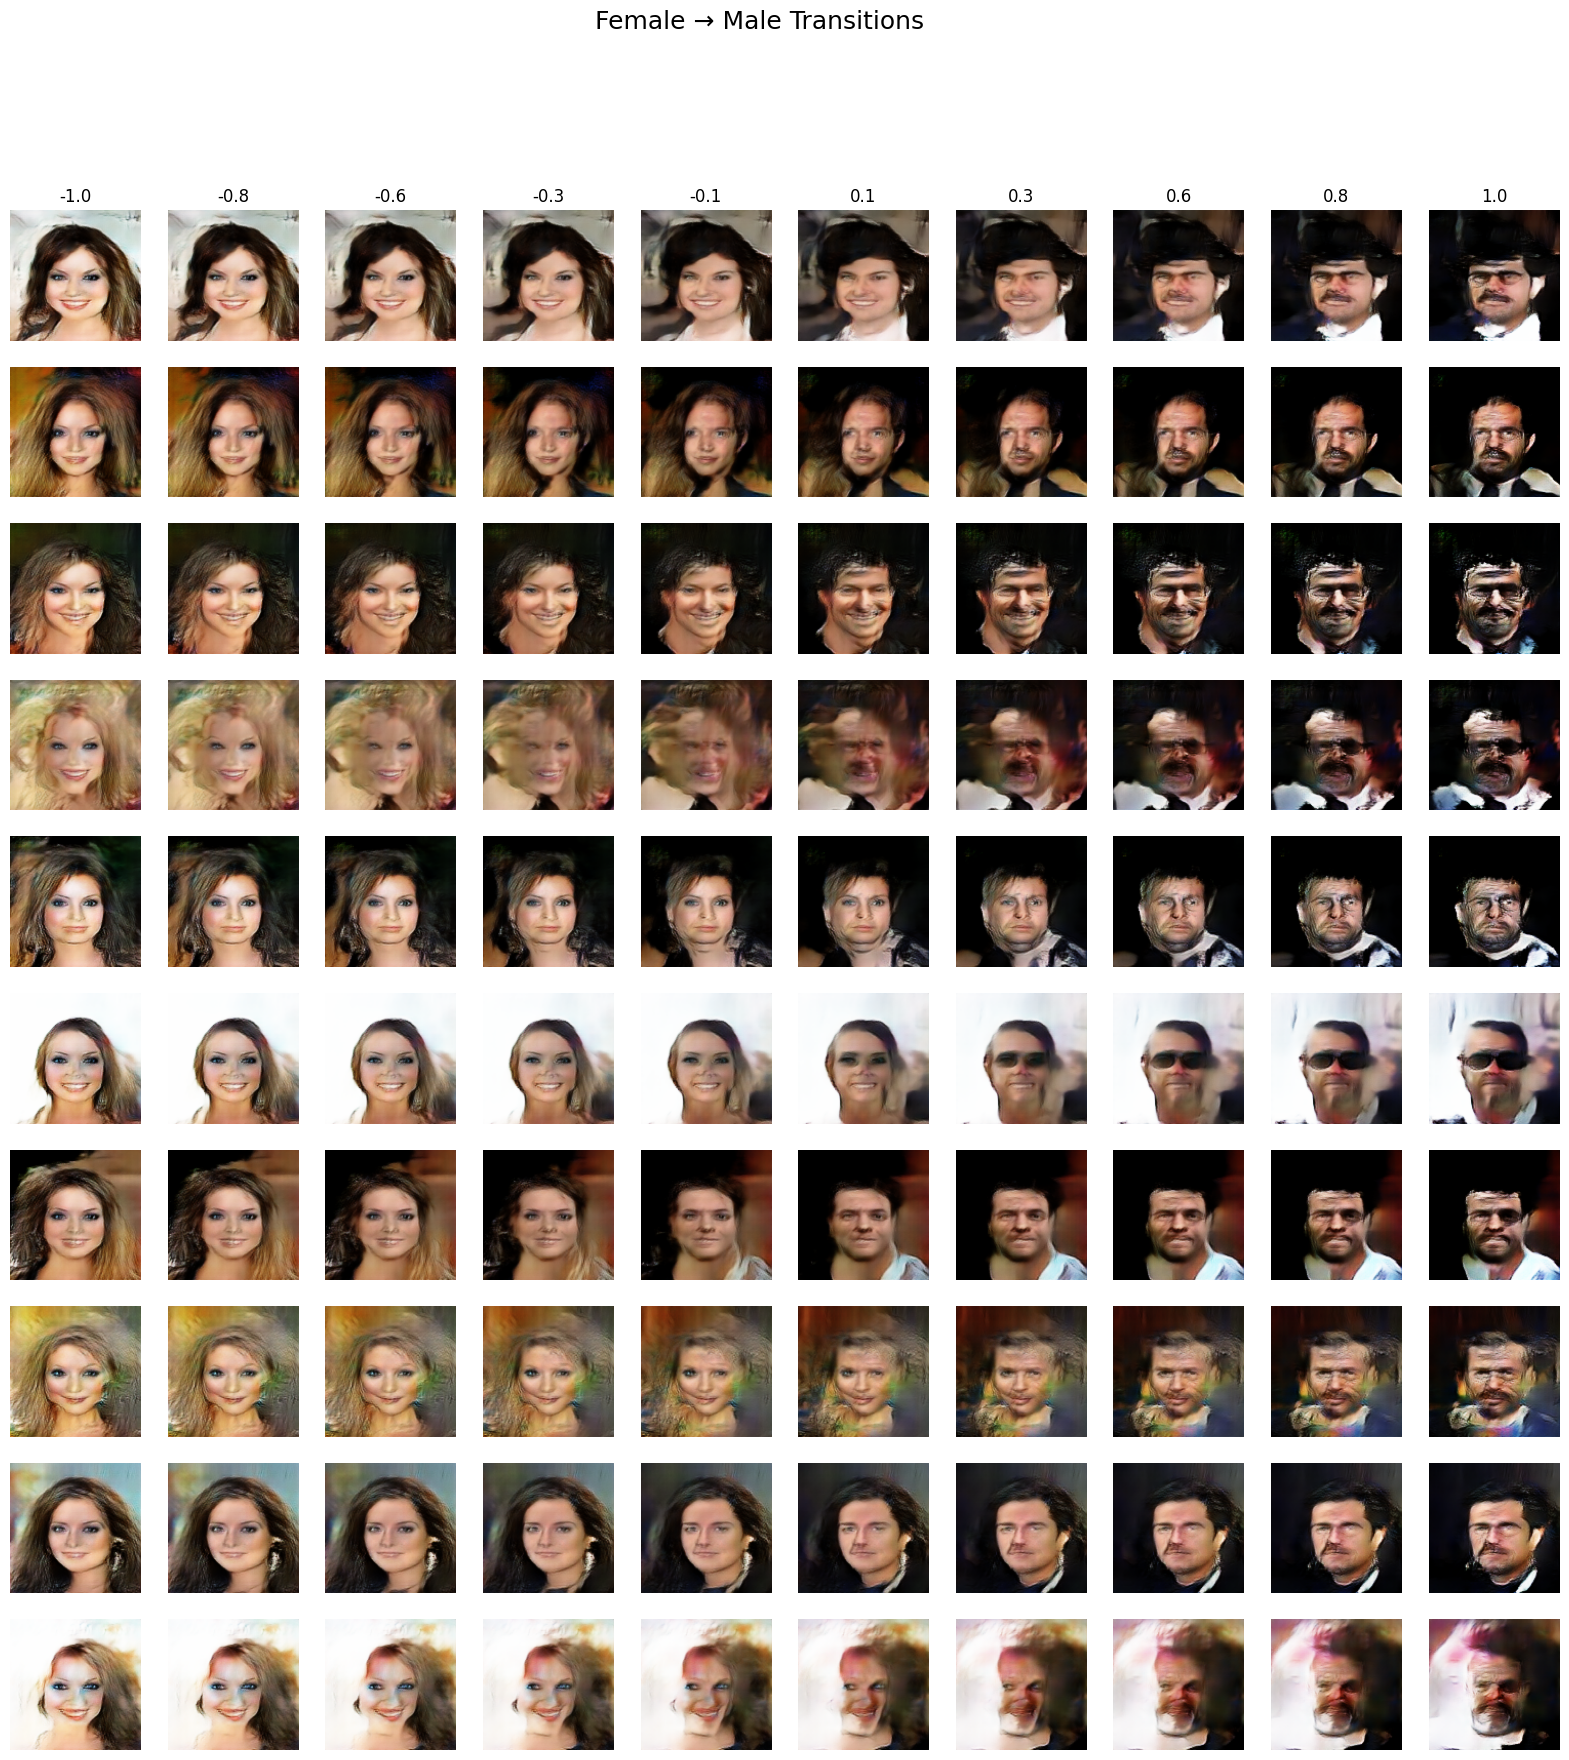

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image
import os

latent_dim = 100
generator = load_model("generator_700.h5")
print("✅ Generator loaded!")

def generate_from_latent(z):
    """Generate an image from latent vector z"""
    img = generator.predict(z, verbose=0)
    img = (img + 1) / 2.0   # scale [-1,1] → [0,1]
    img = np.clip(img[0] * 255, 0, 255).astype("uint8")
    return Image.fromarray(img)

# Load and normalize gender vector
gender_vec = np.load("gender_vec.npy")
gender_vec = gender_vec / np.linalg.norm(gender_vec)

n_faces = 10       # number of identities
n_steps = 10       # transition steps
scale = 5.0        # how strong the gender shift is

os.makedirs("transitions", exist_ok=True)
plt.figure(figsize=(20, 20))

for face_id in range(n_faces):
    # random base latent vector
    z_base = np.random.normal(0, 1, (1, latent_dim))

    # interpolate male → female
    alphas = np.linspace(-1, 1, n_steps)  # -1 = male, +1 = female

    for step_id, alpha in enumerate(alphas):
        z_shift = z_base + alpha * scale * gender_vec
        img = generate_from_latent(z_shift)

        # Save
        img.save(f"transitions/face{face_id}_step{step_id}.jpg")

        # Plot
        plt.subplot(n_faces, n_steps, face_id*n_steps + step_id + 1)
        plt.imshow(img)
        plt.axis("off")
        if face_id == 0:
            plt.title(f"{alpha:.1f}")

plt.suptitle("Female → Male Transitions", fontsize=18)
plt.show()
